## <center> Importing the Dependencies </center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings('ignore')

## <center> Data Collection and Processing </center>

In [ ]:
# loading the csv data to a Pandas DataFrame
parkinson_data = pd.read_csv('Parkinsson.csv')

In [ ]:
# print first 5 rows of the dataset
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# print last 5 rows of the dataset
parkinson_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
# number of rows and columns in the dataset
parkinson_data.shape

(195, 24)

In [ ]:
# getting some info about the data
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinson_data = parkinson_data.drop(columns=['name'])


In [ ]:
# checking for missing values
parkinson_data.isnull().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


In [ ]:
# statistical measures about the data
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# checking the distribution of status Variable
parkinson_data['status'].value_counts()

,count
status,
1,147
0,48


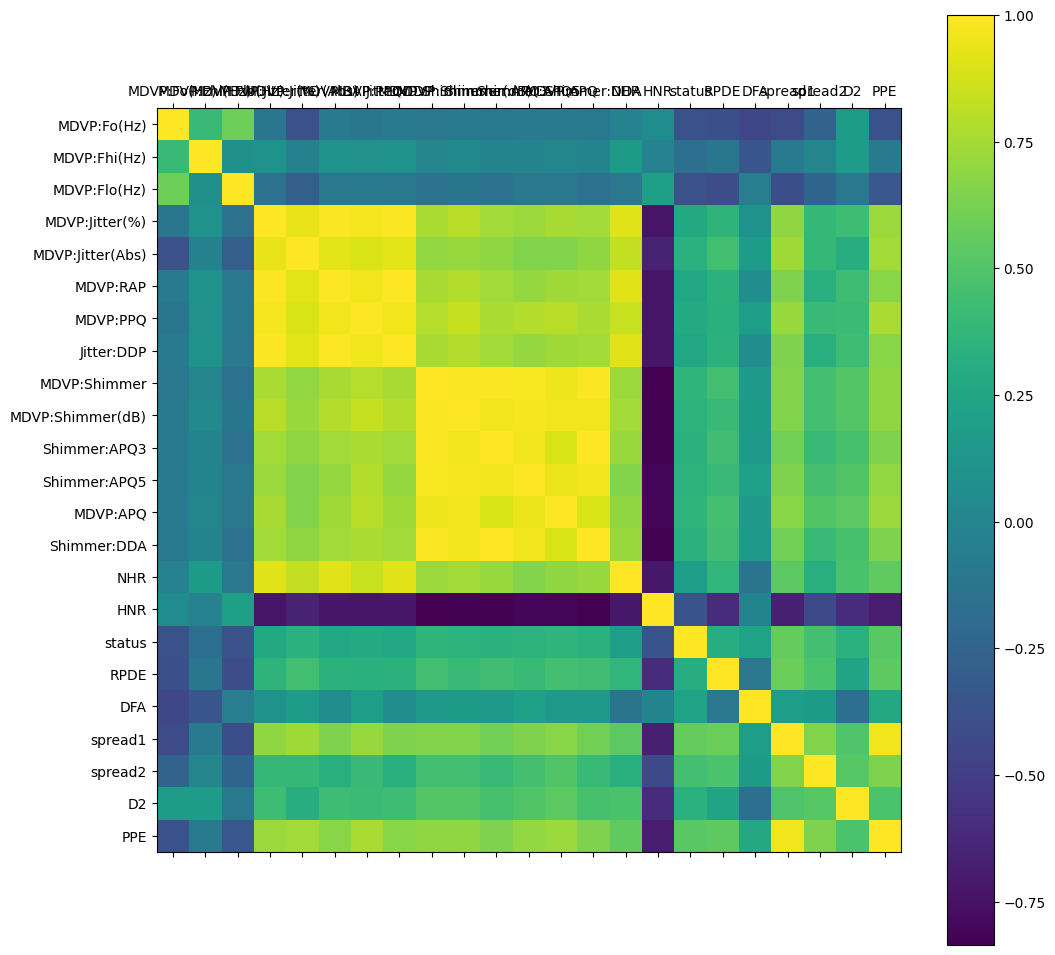

In [ ]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 18,12
plt.matshow(parkinson_data.corr())
plt.yticks(np.arange(parkinson_data.shape[1]), parkinson_data.columns)
plt.xticks(np.arange(parkinson_data.shape[1]), parkinson_data.columns)
plt.colorbar()

status
1    147
0     48
Name: count, dtype: int64


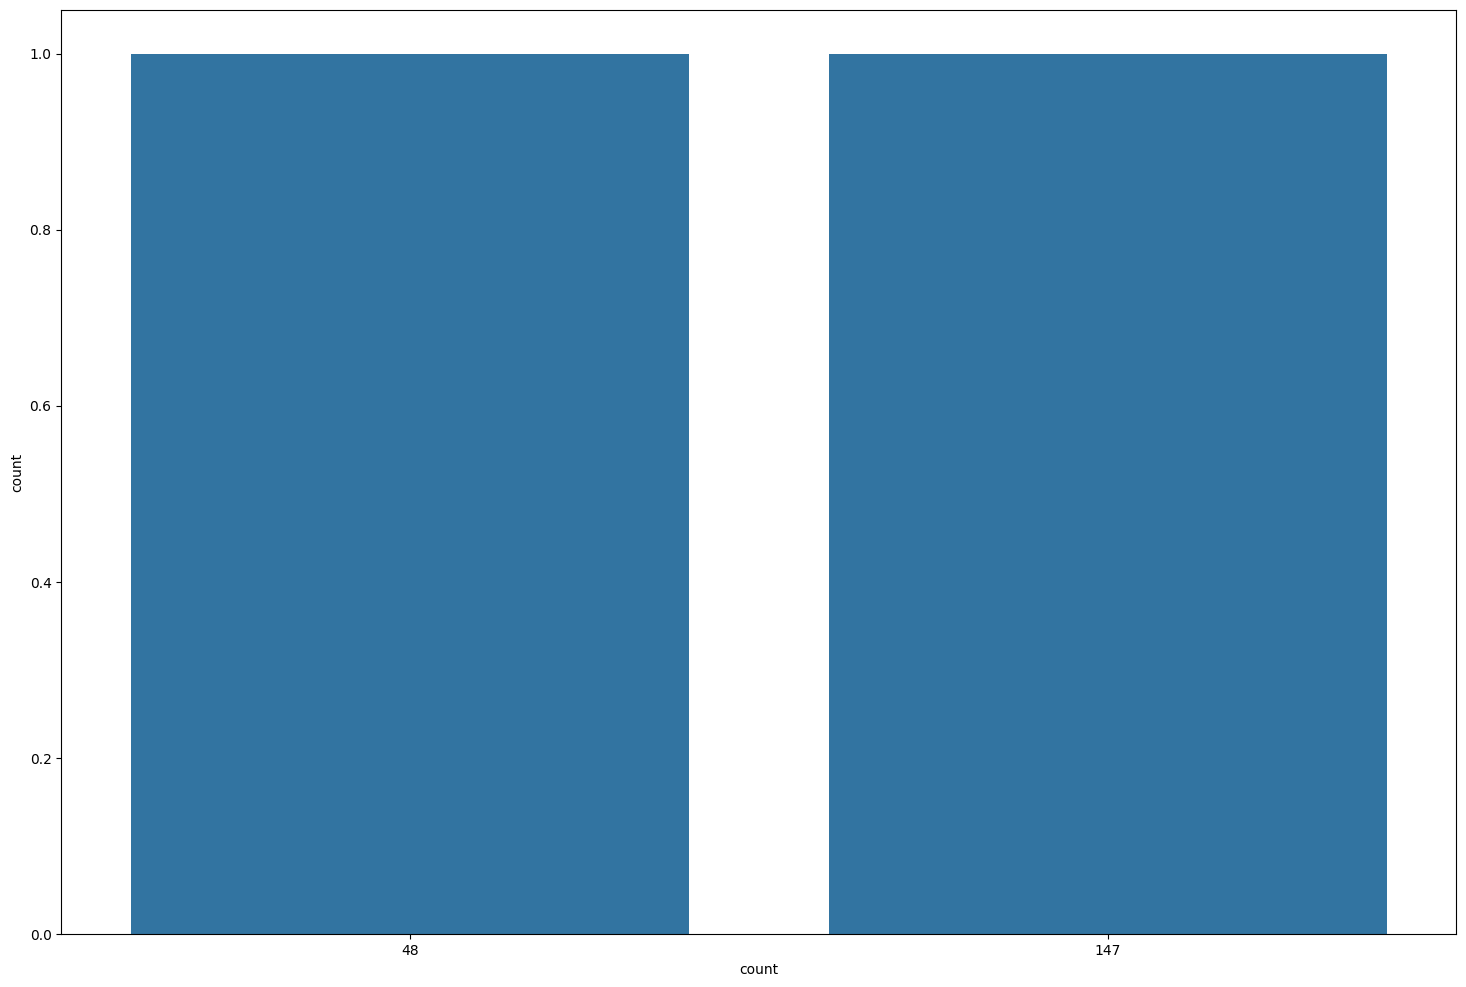

In [ ]:
#data visualization for parkinson disease patients
y = parkinson_data["status"]
status_temp = parkinson_data.status.value_counts()

sns.countplot(x=status_temp)
print(status_temp)

- 1 --> Defective parkinson

- 0 --> Healthy parkinson

ValueError: num must be an integer with 1 <= num <= 18, not 19

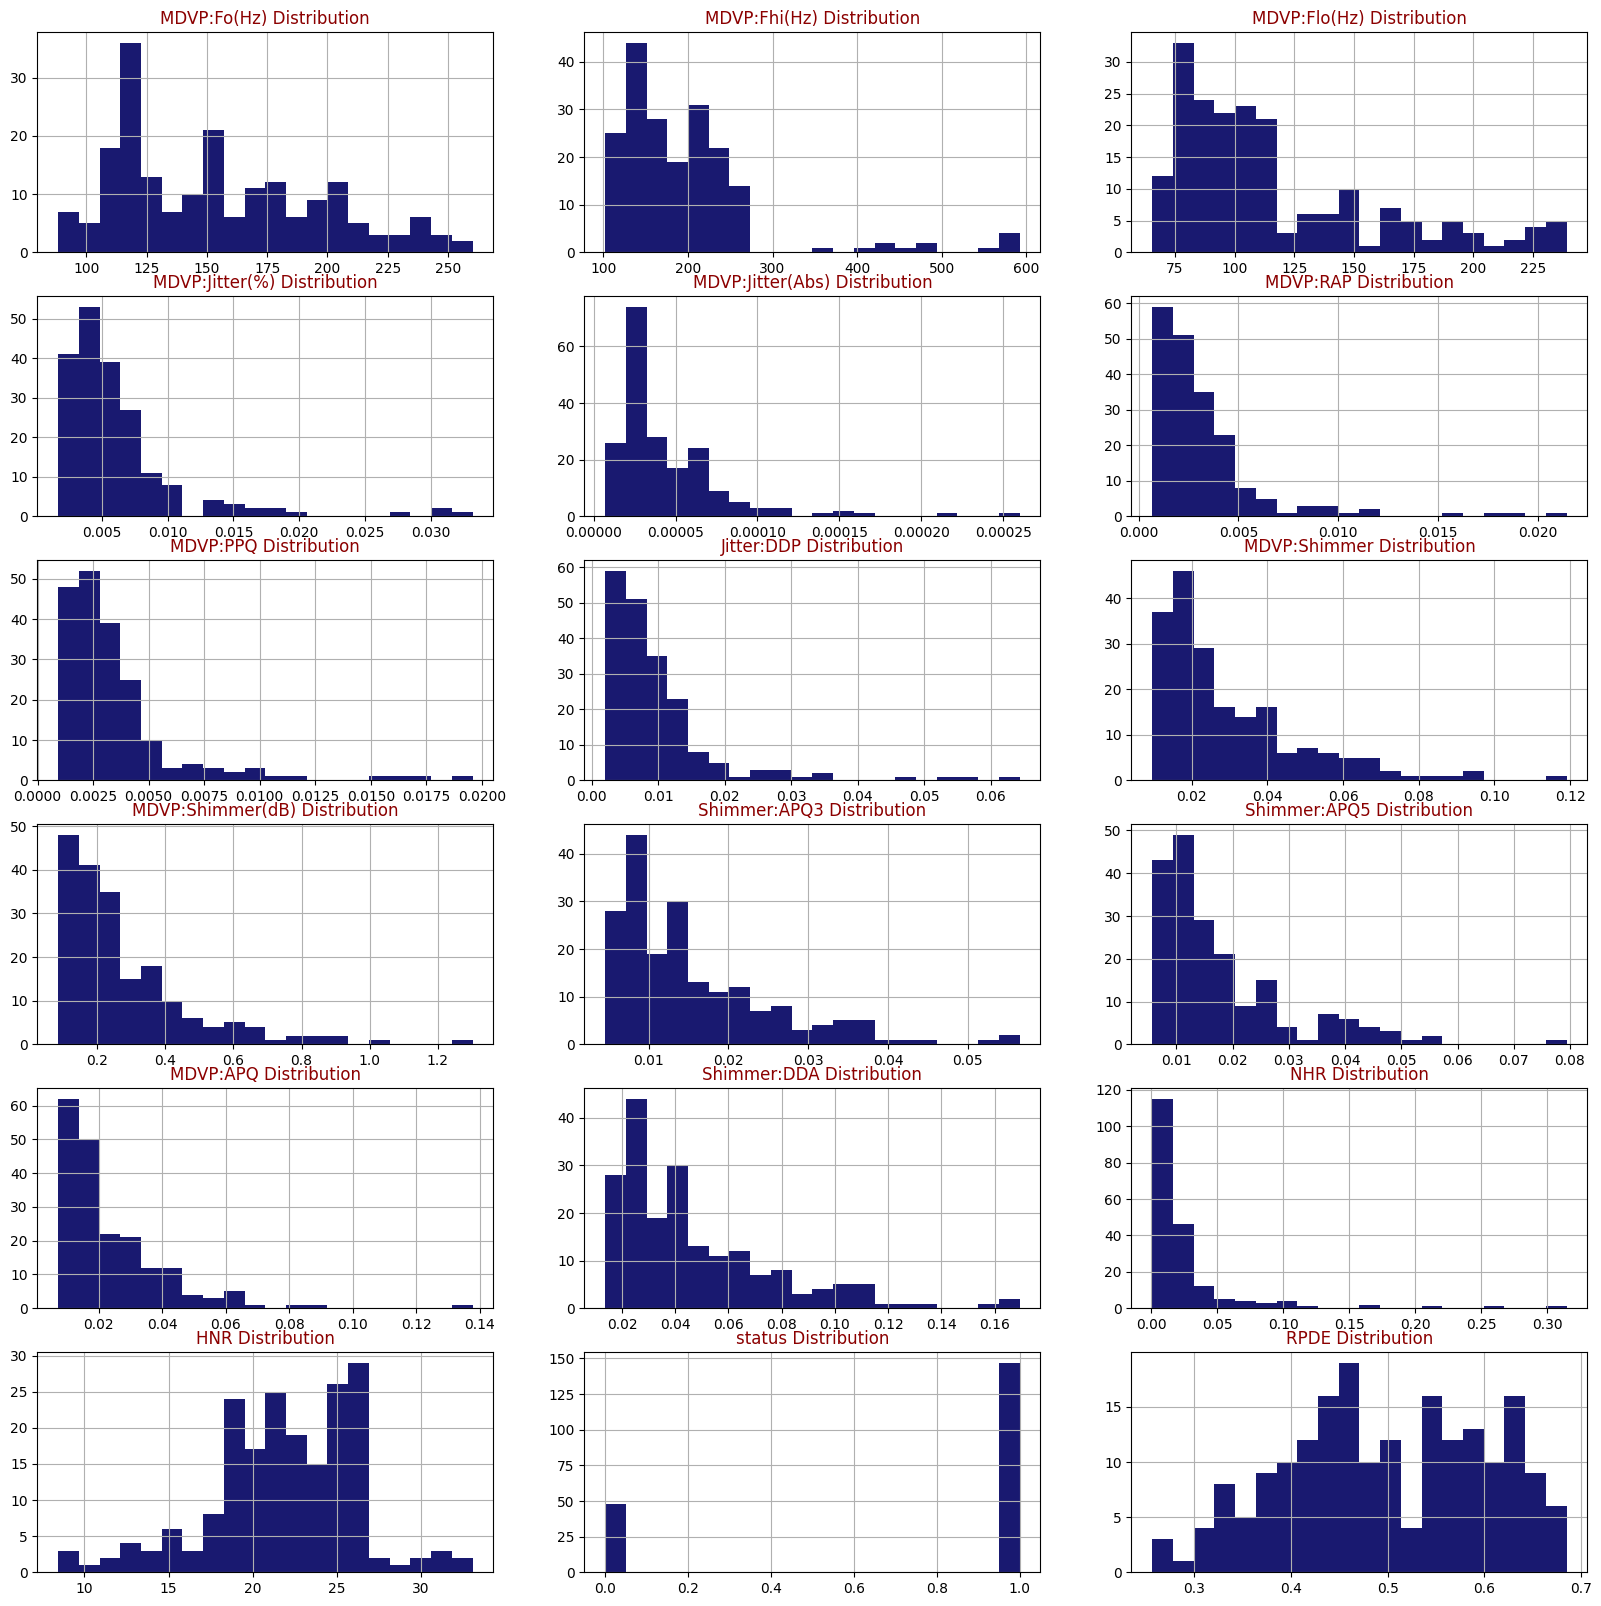

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(parkinson_data,parkinson_data.columns,6,3)

## <center> Splitting the Features and status </center>

In [ ]:
X = parkinson_data.drop(columns='status', axis=1)
Y = parkinson_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


## <center> Splitting the Data into Training data & Test Data </center>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# <center> Model Training </center>

## 1] Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            parkinson = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * parkinson

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary output
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [ ]:
# training the LogisticRegression model with Training data
model1 = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model1.fit(X_train,Y_train)

## Random Forest

In [ ]:

rf=RandomForestClassifier(random_state=100)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)


## <center> Model Evaluation </center>

### Accuracy Score and Classification Report

**bold text**# Logistic Regression

In [ ]:
# accuracy on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.24358974358974358


In [ ]:
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.2564102564102564


In [ ]:
score_lr = round(accuracy_score(X_test_prediction, Y_test)*100,2)
print("The accuracy score achieved using Linear Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Linear Regression is: 25.64 %


In [ ]:
# performance evaluation metrics
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41        39
           1       0.00      0.00      0.00         0

    accuracy                           0.26        39
   macro avg       0.50      0.13      0.20        39
weighted avg       1.00      0.26      0.41        39



## <center> Saving Model </center>


In [ ]:
import pickle

In [ ]:
with open('parkinson_lr.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)

print("Model saved to parkinson_lr.pkl")


Model saved to parkinson_lr.pkl


**bold text**## Random Forest

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 94.87 %


In [ ]:
# accuracy on train data
rf_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(rf_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [ ]:
# accuracy on test data
rf_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9487179487179487


In [ ]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.94      0.97        31

    accuracy                           0.95        39
   macro avg       0.90      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39



## <center> Saving Model </center>


In [ ]:
import pickle

In [ ]:
with open('parkinson_rf.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model saved to parkinson_rf.pkl")


Model saved to parkinson_rf.pkl
